<a href="https://colab.research.google.com/github/saladnga/CS4410-Homeworks/blob/main/Homework3_CS4410_VuHoang_1677986.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework3-CS4410-VuHoang-1677986**

1. Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

2. Load dataset and define X (data), y (target)

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

3. Hyperparameter Turning

In [5]:
k_range = range(1, 31)
k_score = []

In [6]:
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10)
  k_score.append(scores.mean())

4. Optimal k value

In [23]:
optimal_k = k_range[np.argmax(k_score)]
print(f"Optimal k value (k range from 1 to 31): {optimal_k} with accuracy: {max(k_score):.4f}")

Optimal k value (k range from 1 to 31): 13 with accuracy: 0.9800


5. 2 plots: k range from 1 to 31 and k range from 11 to 15 (Zoomed In)

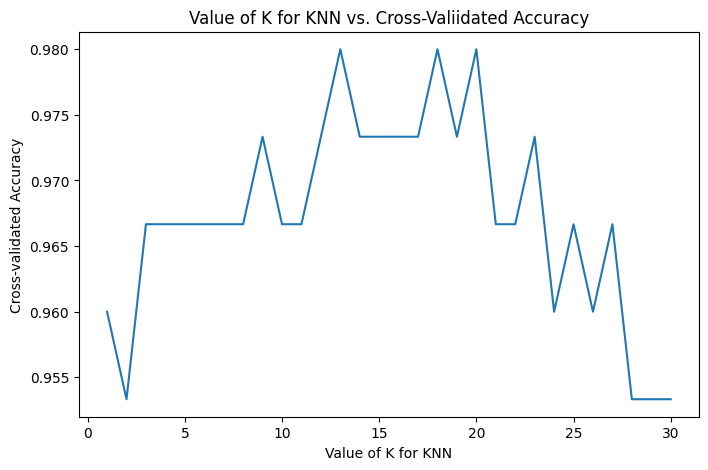

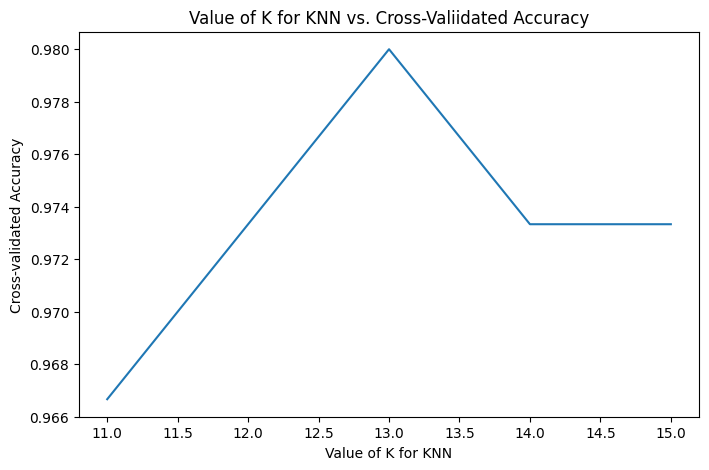

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, k_score, color='tab:blue')
plt.title('Value of K for KNN vs. Cross-Valiidated Accuracy')
plt.ylabel('Cross-validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.xticks(np.arange(0, 31, 5))
plt.show()

zoom_range = range(11, 16)
zoom_scores = k_score[10:15]
plt.figure(figsize=(8, 5))
plt.plot(zoom_range, zoom_scores, color='tab:blue')
plt.title('Value of K for KNN vs. Cross-Valiidated Accuracy')
plt.ylabel('Cross-validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.xticks(np.arange(11, 15.5, 0.5))
plt.show()

6. Grid Search to confirm k=13 has the optimal parameter

In [28]:
param_grid = {'n_neighbors': np.arange(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print(f"GridSearchCV best score:, {grid.best_score_:.4f}")
print("GridSearchCV best params:", grid.best_params_)

if grid.best_params_['n_neighbors'] == 13:
  print("Confirmed: GridSearchCV selected k=13 as optimal parameter")
else:
  print(f"GridSearchCV selected k = {grid.best_params_['n_neighbors']}")

GridSearchCV best score:, 0.9800
GridSearchCV best params: {'n_neighbors': np.int64(13)}
Confirmed: GridSearchCV selected k=13 as optimal parameter
